In [1]:
import pandas as pd
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [5]:
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from xgboost import XGBClassifier

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load the dataset

In [10]:
df = pd.read_csv("heart_disease_uci.csv")

# print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [12]:
df.shape

(920, 16)

In [13]:
# Id column
df['id'].min(), df['id'].max()

(1, 920)

In [14]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

In [15]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

## Plots

/var/folders/ld/zxygdjc50qn3ct35m3lccwg80000gn/T/ipykernel_35272/2142100135.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)


<Axes: xlabel='age', ylabel='Count'>

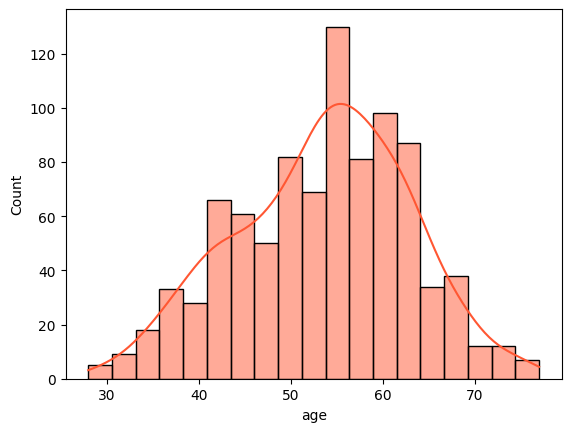

In [16]:
import seaborn as sns

# Define custom colors
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]  # Example colors, you can adjust as needed

# Plot the histogram with custom colors
sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)

Mean 53.51086956521739
Median 54.0
Mode 0    54
Name: age, dtype: int64


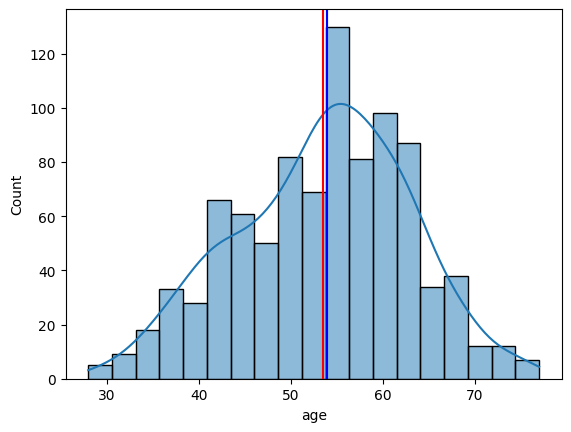

In [17]:
# Plot the mean, Median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color= 'Green')
plt.axvline(df['age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())

In [19]:
# calculating the percentage fo male and female value counts in the data

male_count = 726
female_count = 194

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

Male percentage i the data: 78.91%
Female percentage in the data : 21.09%


In [20]:
# Find the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [21]:
# find the unique values in the dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

## Exploring Chest Pain column

<Axes: xlabel='cp', ylabel='count'>

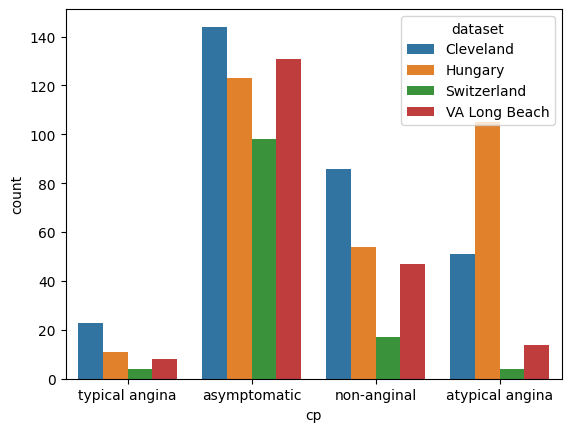

In [25]:
# count plot of cp column by dataset column
sns.countplot(df,x='cp',hue='dataset')

In [26]:
# lets summerize the trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [27]:
# Dealing with Missing values in trestbps column.
# find the percentage of misssing values in trestbps column
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() /len(df) *100:.2f}%")

Percentage of missing values in trestbps column: 6.41%


In [28]:
# Impute the missing values of trestbps column using iterative imputer
# create an object of iteratvie imputer
imputer1 = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer on trestbps column
imputer1.fit(df[['trestbps']])

# Transform the data
df['trestbps'] = imputer1.transform(df[['trestbps']])

# Check the missing values in trestbps column
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")

Missing values in trestbps column: 0


In [29]:
# let's see which columns has missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

In [30]:
# create an object of iterative imputer 
imputer2 = IterativeImputer(max_iter=10, random_state=42)

# fit transform on ca,oldpeak, thal,chol and thalch columns
df['ca'] = imputer2.fit_transform(df[['ca']])
df['oldpeak']= imputer2.fit_transform(df[['oldpeak']])
df['chol'] = imputer2.fit_transform(df[['chol']])
df['thalch'] = imputer2.fit_transform(df[['thalch']])

In [31]:
# let's check again for missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

In [32]:
print(f"The missing values in thal column are: {df['thal'].isnull().sum()}")

The missing values in thal column are: 486


In [33]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [34]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [38]:
# This function imputes missing values in categorical columnsdef impute_categorical_missing_data(passed_col):
passed_col = categorical_cols
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    
    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [39]:
df.isnull().sum().sort_values(ascending=False)

thal        486
slope       309
fbs          90
exang        55
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
thalch        0
oldpeak       0
ca            0
num           0
dtype: int64

In [41]:
missing_data_cols = df.isnull().sum()[df.isnull().sum()>0].index.tolist()

missing_data_cols

# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.31 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.04 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 80.35 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



In [43]:
from matplotlib.colors import ListedColormap

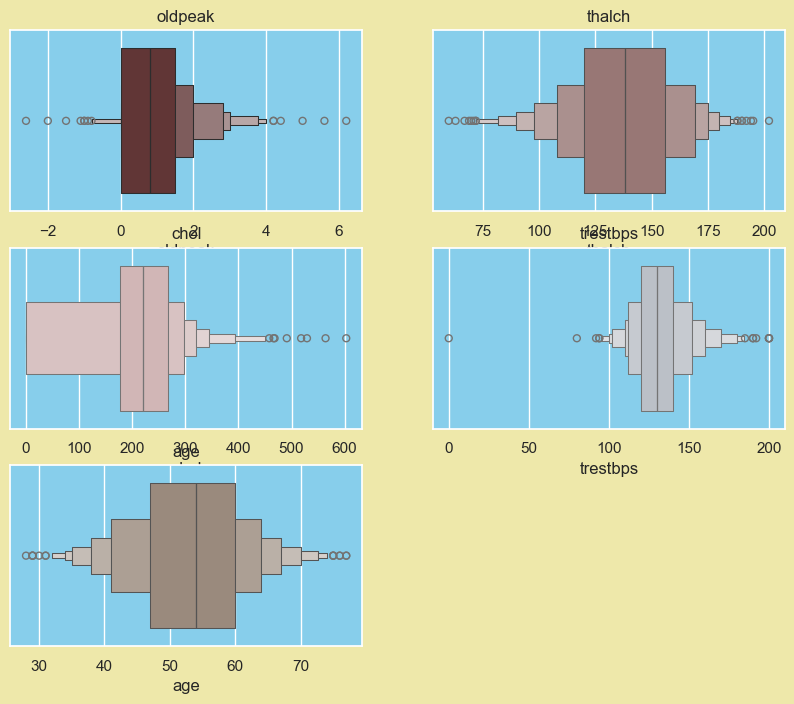

In [44]:
sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})  # Change figure background color

palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(10,8))

for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=df[col], color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(col)
    
plt.show()

In [45]:
# split the data into X and y
X= df.drop('num', axis=1)
y = df['num']

"""encode X data using separate label encoder for all categorical columns and save it for inverse transform"""
# Task: Separate Encoder for all categorical and object columns and inverse transform at the end. 
Label_Encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = Label_Encoder.fit_transform(X[col])
    else:
        pass
        

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [47]:
# improt ALl models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#importing pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

In [48]:
# create a list of models to evaluate

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),   
    
    ('Support Vector Machine', SVC(random_state=42)),
    
    ('Naye base Classifier', GaussianNB())
    
    
]

best_model = None
best_accuracy = 0.0

In [51]:
#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),
        #('encoder', OneHotEncoder(handle_unknow='ignore'))
        ('model', model)
    ])
    
    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # make prediction on the test data
    y_pred = pipeline.predict(X_test)
    
    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
     #print the performance metrics
    print("Model", name)
    print("Cross Validatino accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print()
    
    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
    
# Retrieve the best model
print("Best Model: ", best_model)


Model Logistic Regression
Cross Validatino accuracy:  0.52052573932092
Test Accuracy:  0.45652173913043476

Model Gradient Boosting
Cross Validatino accuracy:  0.6243884629426798
Test Accuracy:  0.5869565217391305

Model KNeighbors Classifier
Cross Validatino accuracy:  0.5857539247900694
Test Accuracy:  0.5543478260869565

Model Decision Tree Classifier
Cross Validatino accuracy:  0.5918437385907266
Test Accuracy:  0.5108695652173914

Model AdaBoost Classifier
Cross Validatino accuracy:  0.5905805038335158
Test Accuracy:  0.5108695652173914

Model Random Forest
Cross Validatino accuracy:  0.6594450529390288
Test Accuracy:  0.6195652173913043

Model XGboost Classifier
Cross Validatino accuracy:  0.6316465863453816
Test Accuracy:  0.5760869565217391

Model Support Vector Machine
Cross Validatino accuracy:  0.5978167214311793
Test Accuracy:  0.5

Model Naye base Classifier
Cross Validatino accuracy:  0.5675721066082512
Test Accuracy:  0.43478260869565216

Best Model:  Pipeline(steps=[('m